In [38]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging,DoneFeatureMan
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
Cat = [20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]

amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


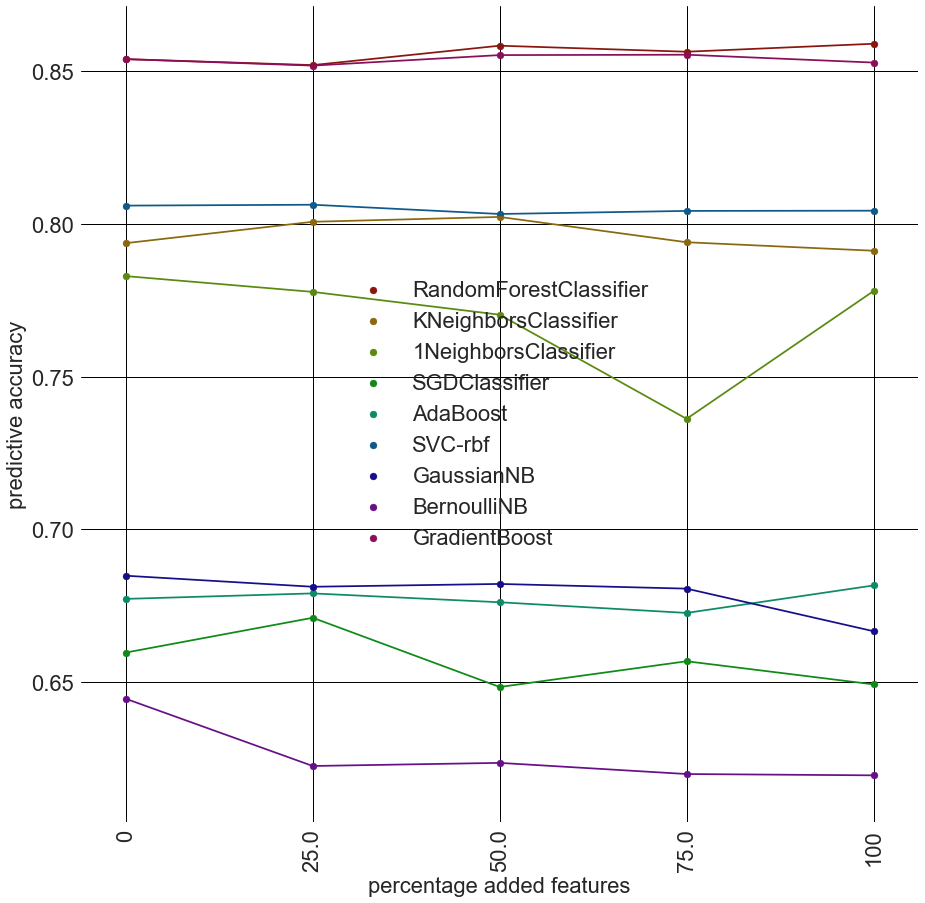

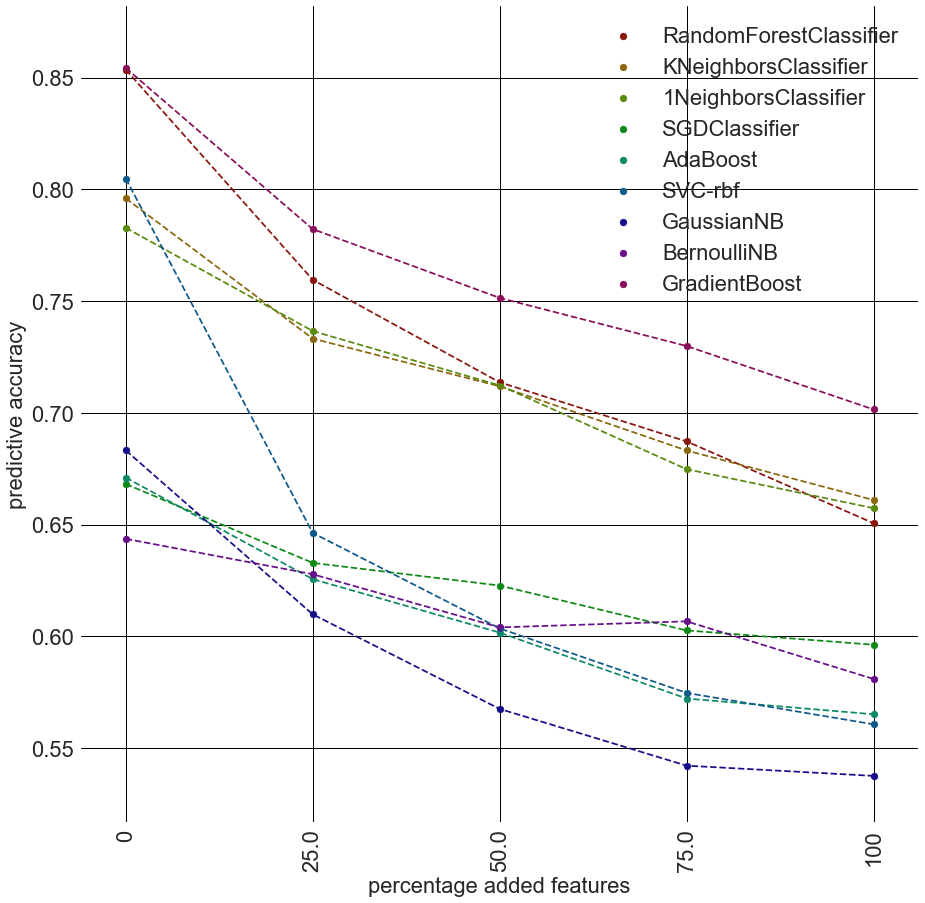

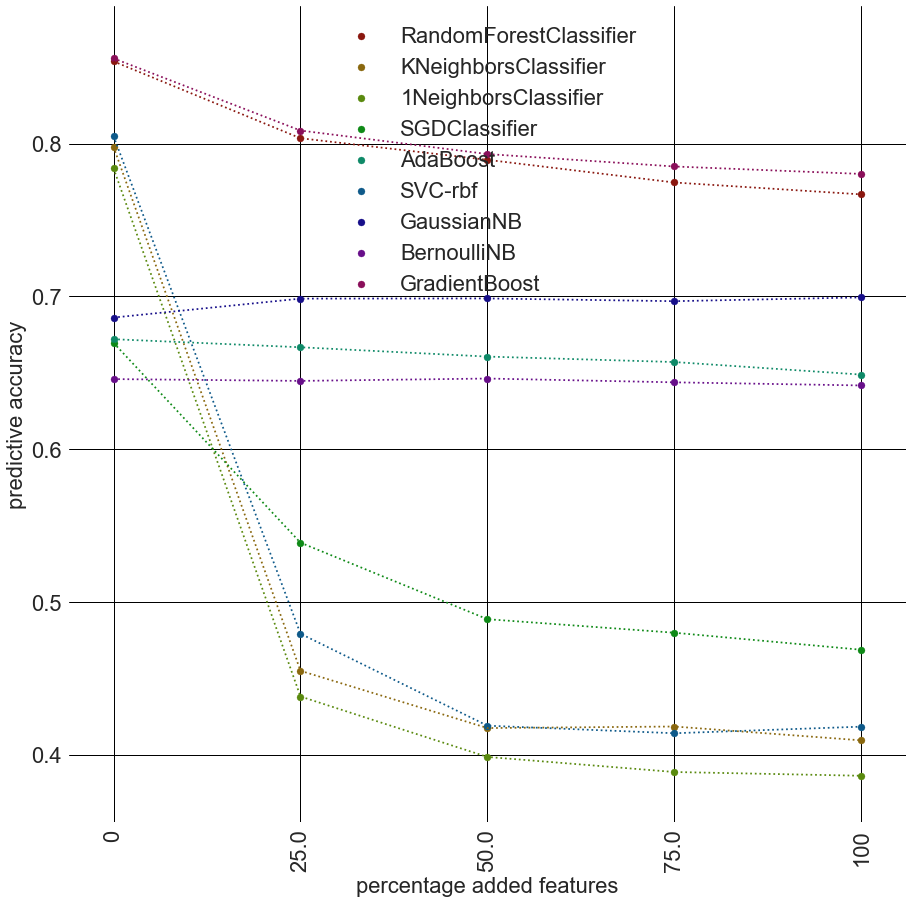

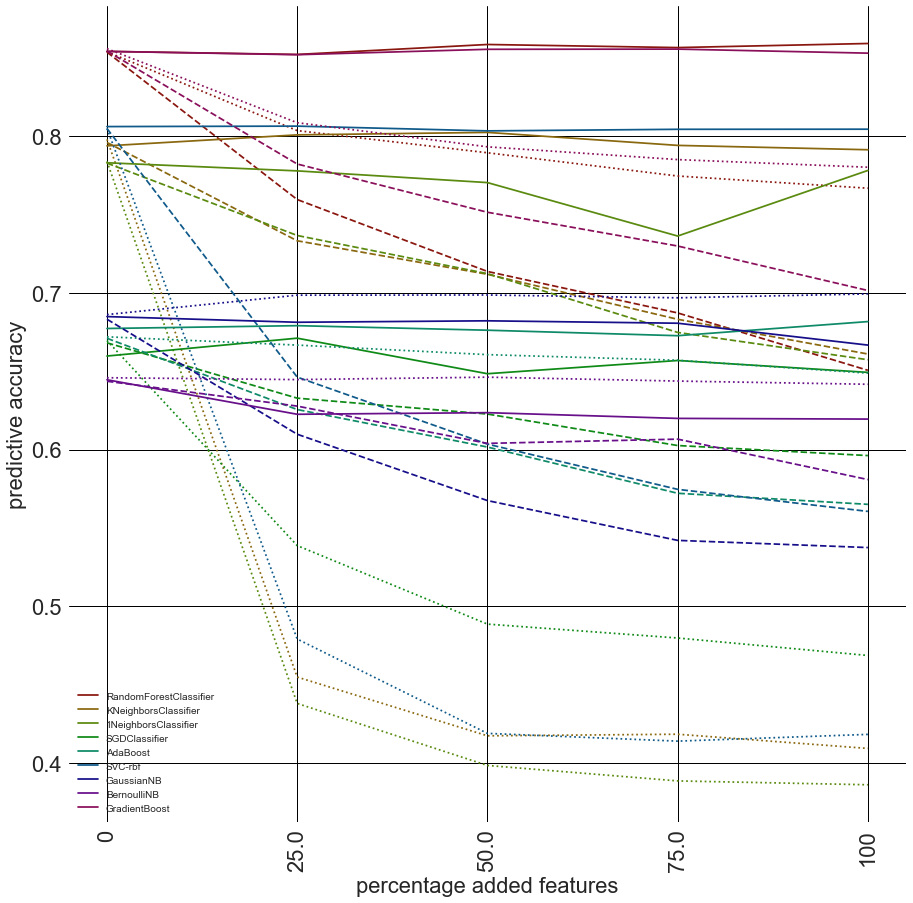

In [15]:
#Three types of feature addition
func = 'cvScoreFeatures6Laptop'
func2 = 'cvScoreFeatures5Duration'
func3 = 'cvScoreFeatures4Duration'
clfName = clfNames[0]
amountList = [0.25,0.5,0.75,1.0]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
func3Man = DoneFeatureMan(func3,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        if did in func3Man:
            intersect.append(did)
didList = []
for did in intersect:
    if did in Cat:
        didList.append(did)
# didList = intersect

# didList = Cat
scores = []
scores2 = []
scores3 = []
amountList = [0.25,0.5,0.75,1]
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        score3 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) or not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if did in Cat:
                score3.append(read_features('cvScoreFeatures4Fixed',clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            else:
                score3.append(read_features(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
        scores[i].append(score1)
        scores2[i].append(score2)
        scores3[i].append(score3)
score1 = []
score2 = []
score3 = []
score4 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    score4.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
            score4[j][0] = score4[j][0] + (scores3[k][j][i][0])/(len(didList)*len(amountList))
            score4[j][i+1] = score4[j][i+1] + (scores3[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList


fig, ax = plt.subplots()
# _=plt.title(' accuracy against added duplicate features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
    _=ax.plot(x_axis, score2[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i],label=clfNames[i])
#     _=ax.plot(amountList, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
# _=ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added redundant duplicate numerical features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score3[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score3[i], color = cl[i],ls = '--')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added random features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score4[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score4[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added random features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
#     _=ax.scatter(x_axis, score4[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score4[i], color = cl[i],ls = ':')
    _=ax.plot(amountList, score3[i], color = cl[i],ls = '--')
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()
print('categorical datasets')

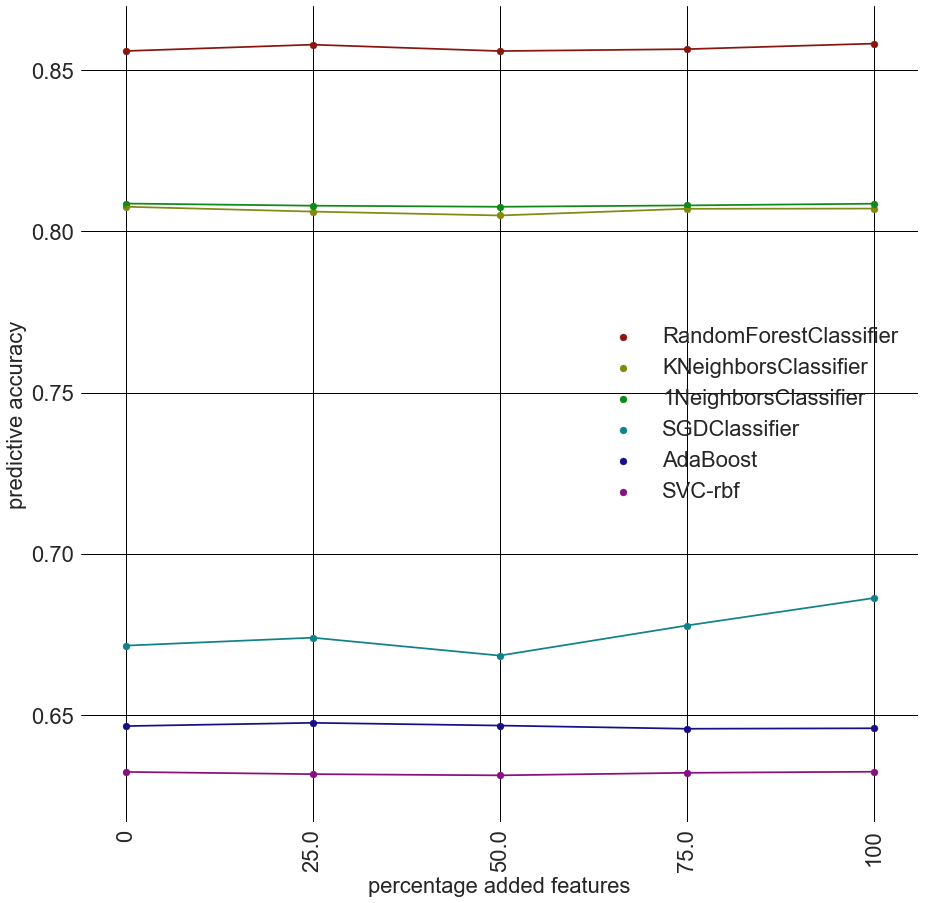

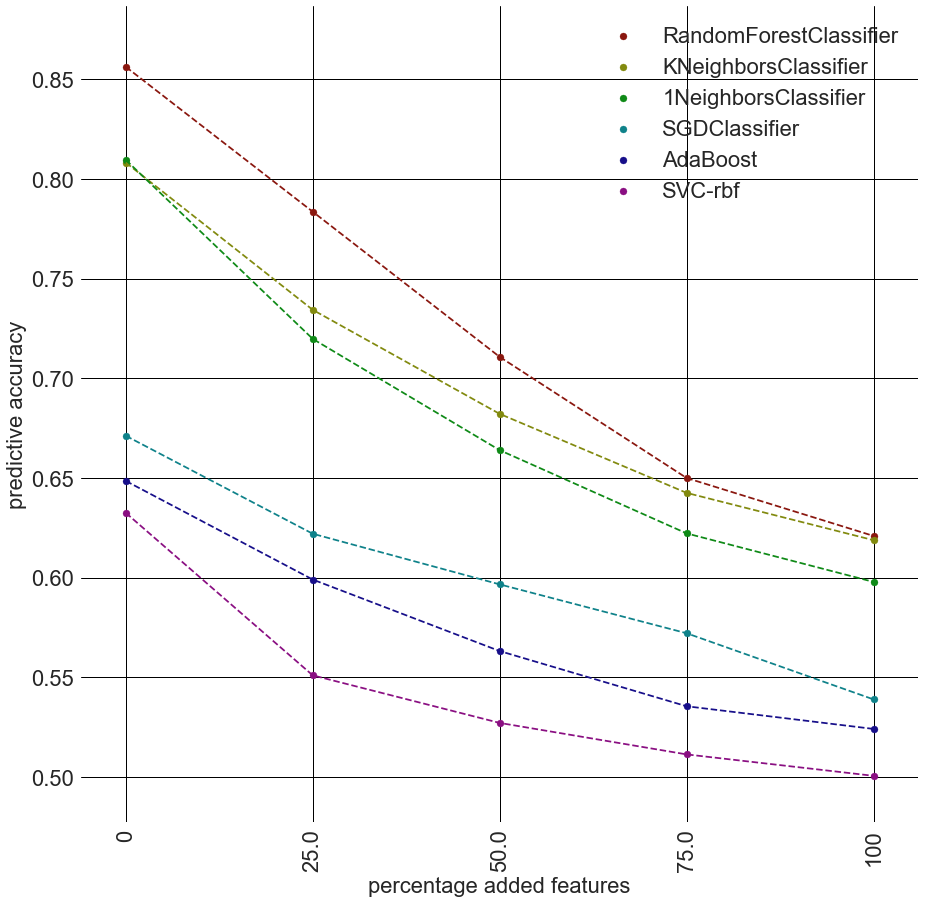

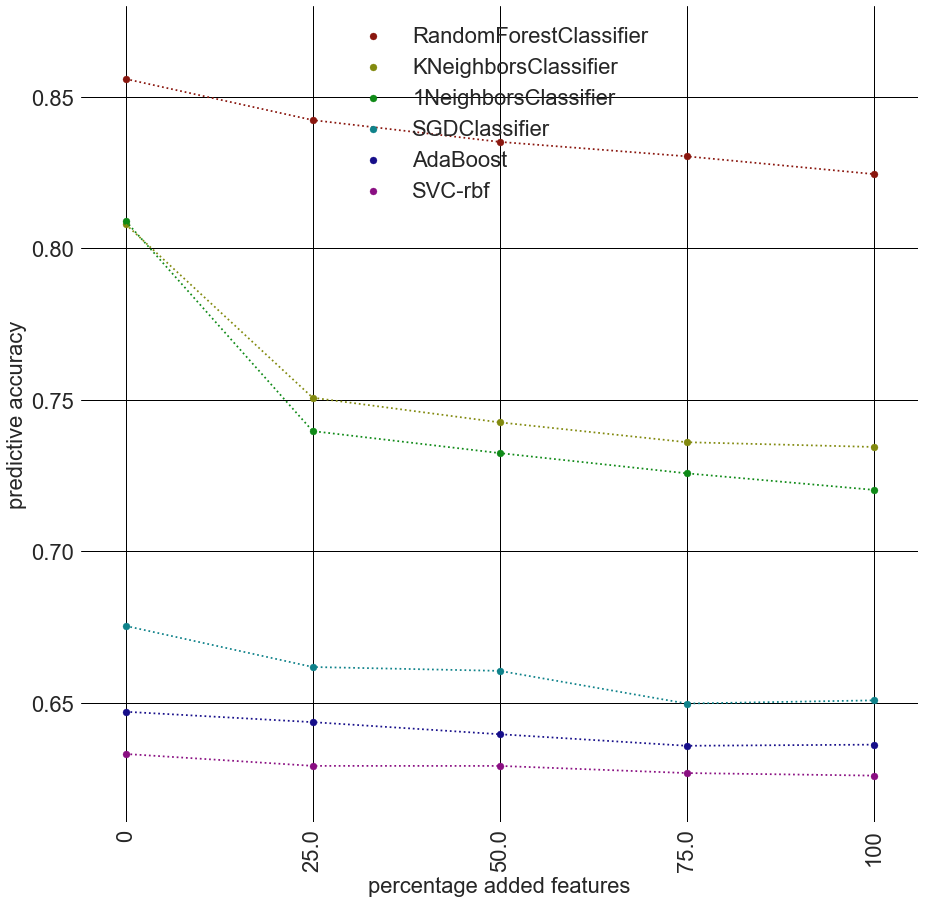

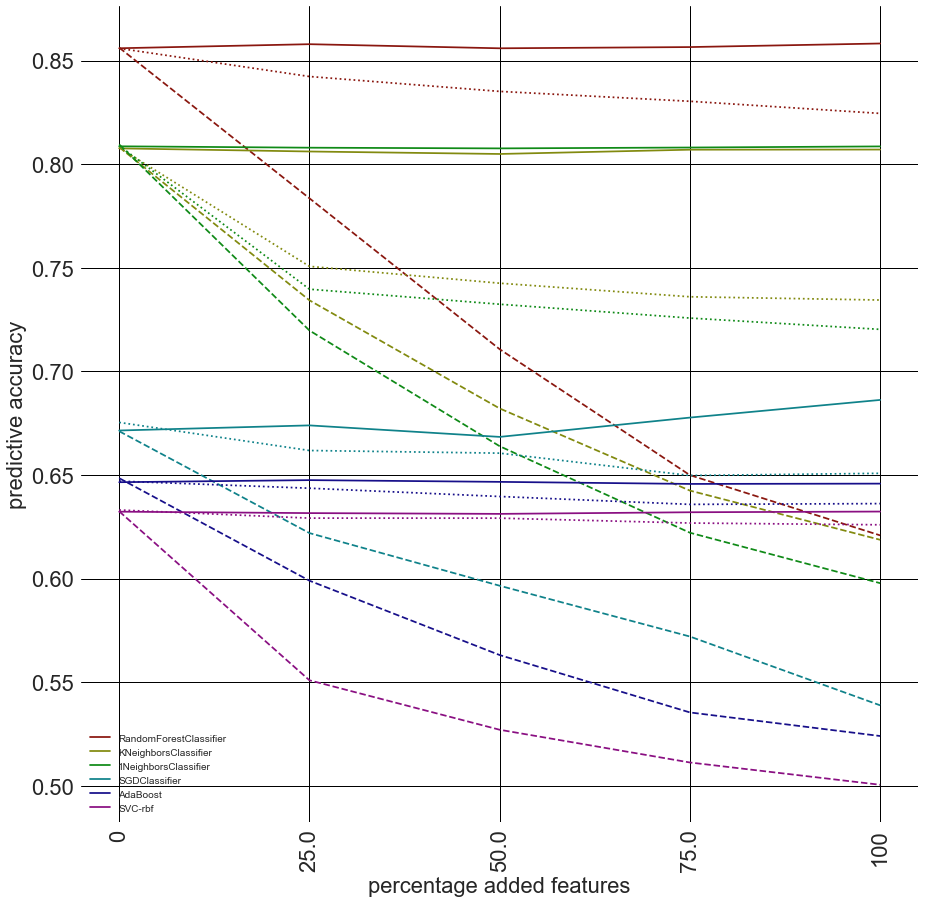

numberical datasets


In [33]:
#Three types of feature addition
func = 'cvScoreFeatures6Laptop'
func2 = 'cvScoreFeatures5Duration'
func3 = 'cvScoreFeatures4Duration'
clfName = clfNames[0]
amountList = [0.25,0.5,0.75,1.0]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
func3Man = DoneFeatureMan(func3,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        if did in func3Man:
            intersect.append(did)
didList = []
for did in intersect:
    if did in NonCat:
        didList.append(did)
# didList = intersect

# didList = Cat
scores = []
scores2 = []
scores3 = []
amountList = [0.25,0.5,0.75,1]
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        score3 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) or not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if did in Cat:
                score3.append(read_features('cvScoreFeatures4Fixed',clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            else:
                score3.append(read_features(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
        scores[i].append(score1)
        scores2[i].append(score2)
        scores3[i].append(score3)
score1 = []
score2 = []
score3 = []
score4 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    score4.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
            score4[j][0] = score4[j][0] + (scores3[k][j][i][0])/(len(didList)*len(amountList))
            score4[j][i+1] = score4[j][i+1] + (scores3[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList


fig, ax = plt.subplots()
# _=plt.title(' accuracy against added duplicate features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
    _=ax.plot(x_axis, score2[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i],label=clfNames[i])
#     _=ax.plot(amountList, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
# _=ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added redundant duplicate numerical features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score3[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score3[i], color = cl[i],ls = '--')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added random features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score4[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score4[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added random features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
#     _=ax.scatter(x_axis, score4[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score4[i], color = cl[i],ls = ':')
    _=ax.plot(amountList, score3[i], color = cl[i],ls = '--')
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()
print('numberical datasets')

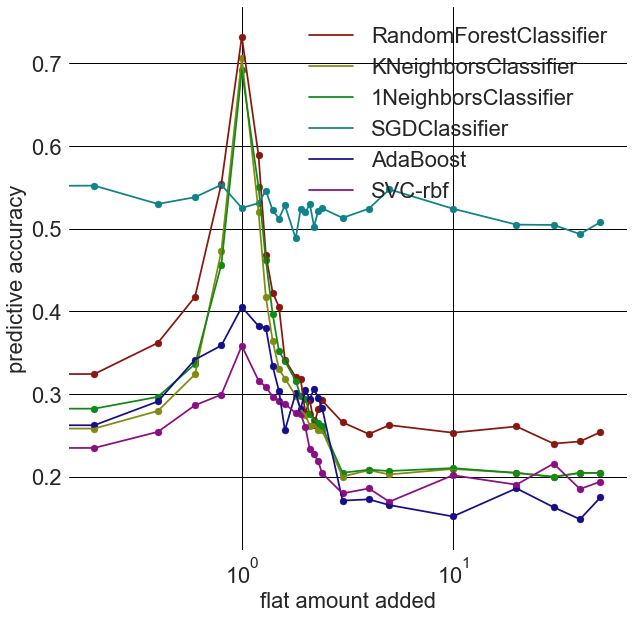

In [19]:
# absolute addition of values 
func = 'cvScoreNoise3'
name = 'scores'
didList = [10,12,18]
amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf']
scores = []

for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,amount,did):
                print(func,clfName,amount,did)
            score1.append(read_did_pred(func,clfName,amount,did,name))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (sum(scores[k][j][i][0]))/10/len(didList)
            score2[j][i] = score2[j][i] + (sum(scores[k][j][i][1]))/10/len(didList)

x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' performance to adding flat values to each features ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('flat amount added')
fig.set_figheight(10)
fig.set_figwidth(10)
# ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
# _=plt.xticks(x_axis,x_axis ,rotation='vertical')
# for i,amount in enumerate(amountList):
#     _=plt.axvline(x=amount,color= 'black')
# #     _=plt.axhline(y=score2[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
ax.legend( prop={'size': 22})
plt.show()

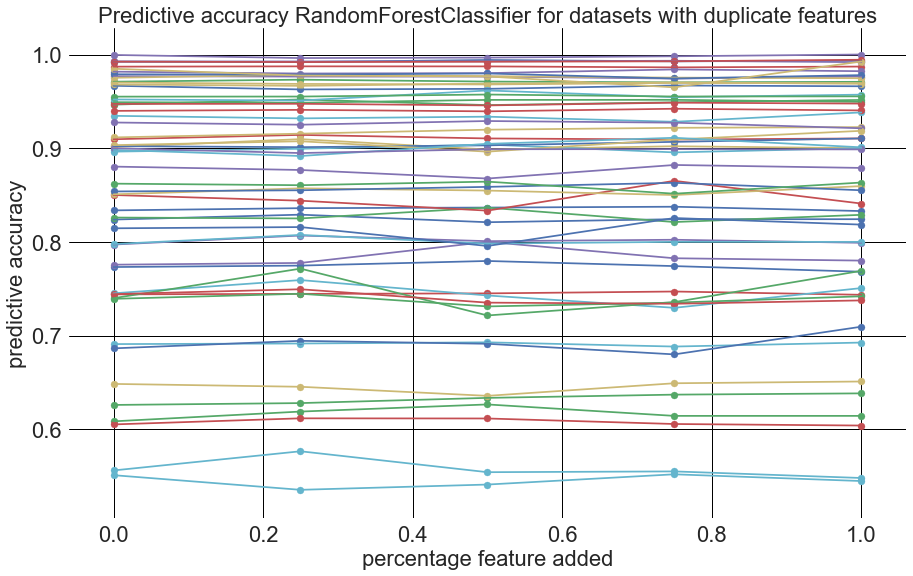

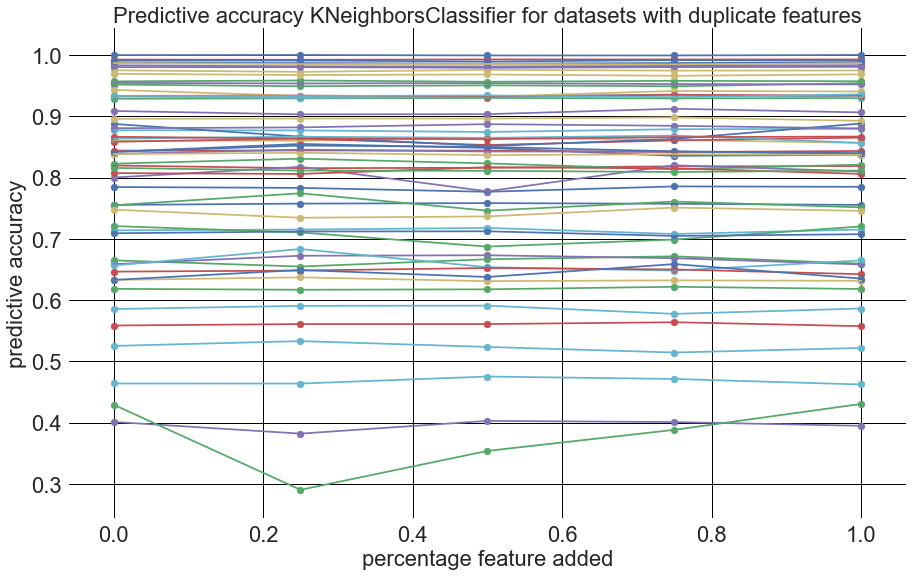

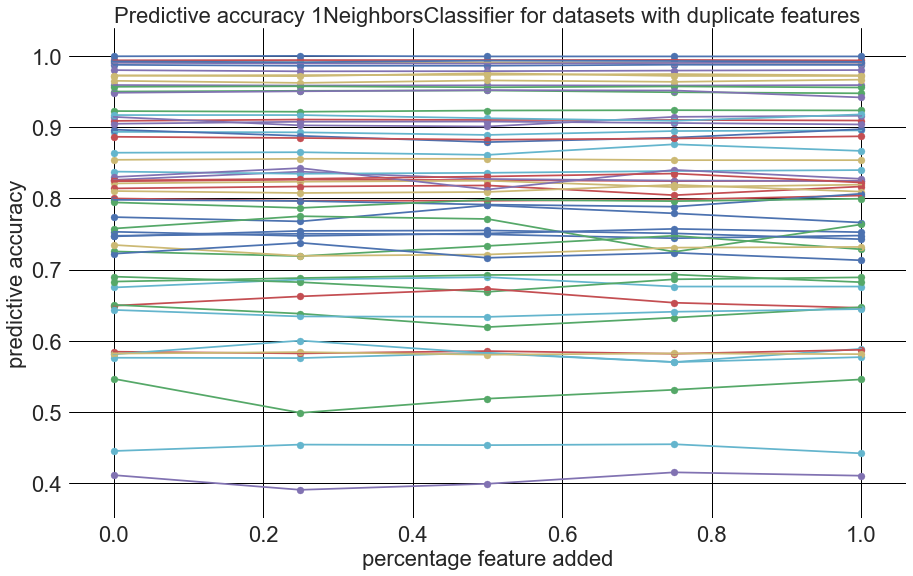

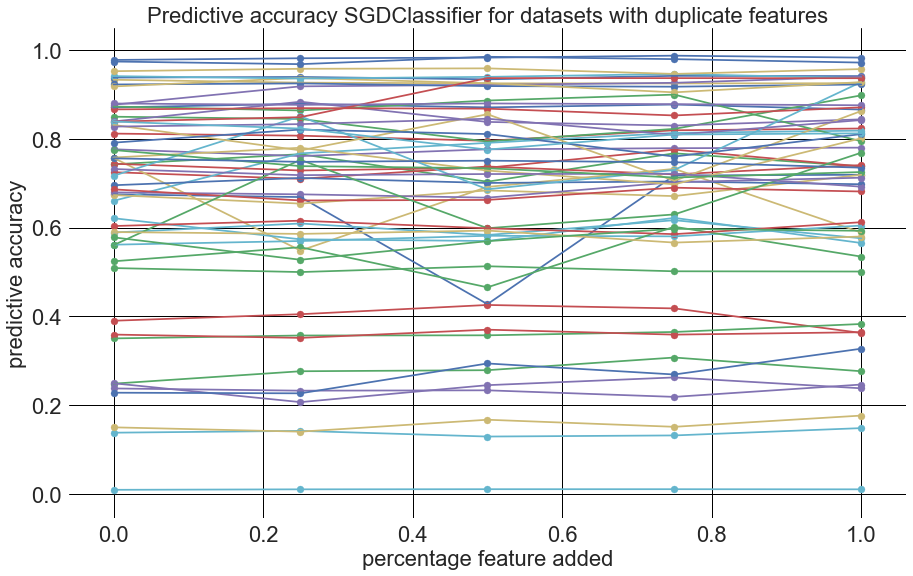

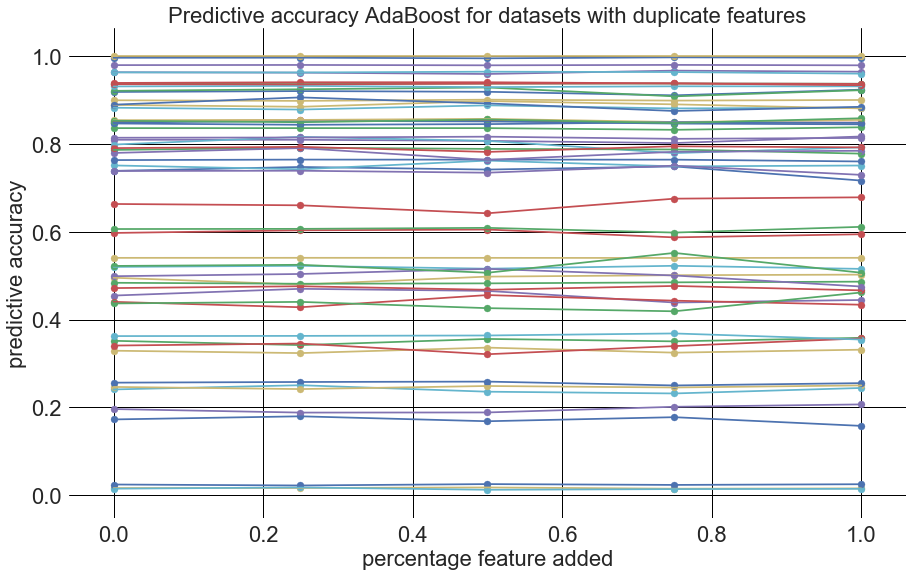

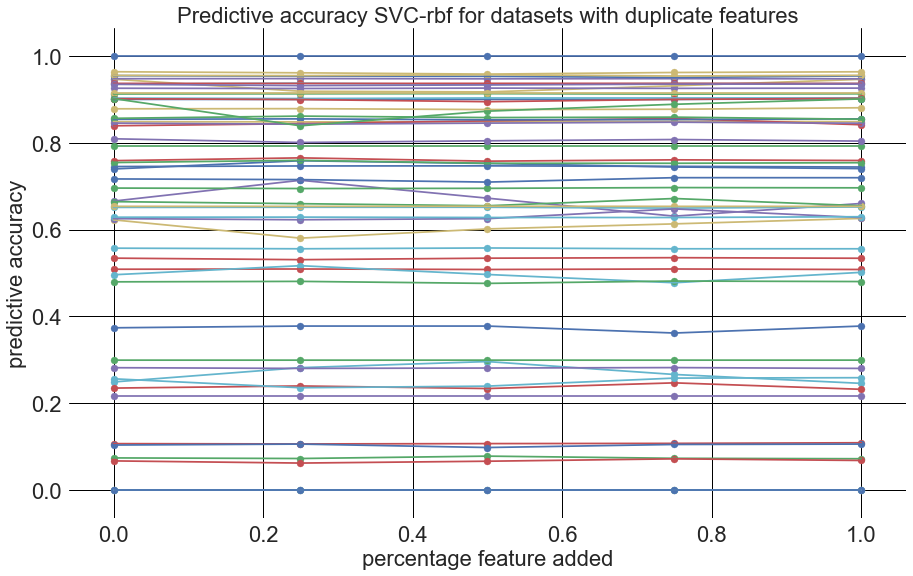

In [35]:
#per classifier per dataset feature addition
amountList = [0.25,0.5,0.75,1]
amountList2 = [0,0.25,0.5,0.75,1]
clf1 = 1
for clf1 in range(len(clfNames)):
    perDidRf = []
    for i,did in enumerate(scores): #insert which scores
        perDidRf.append([])
        for j,amount in enumerate(did[clf1]):
            if j == 0:
                perDidRf[i].append(amount[0]/len(amountList))
            else:
                perDidRf[i][0] = perDidRf[i][0] + amount[0]/len(amountList)
            perDidRf[i].append(amount[1])
    fig, ax = plt.subplots()
    _=plt.title('Predictive accuracy ' + clfNames[clf1] + ' for datasets with duplicate features',fontdict = {'fontsize': 22} )


    for i,did in enumerate(didList):
        _=ax.plot(amountList2, perDidRf[i])
        _=ax.scatter(amountList2, perDidRf[i])
    _=plt.ylabel('predictive accuracy',fontdict = {'fontsize': 22})
    _=plt.xlabel('percentage feature added',fontdict = {'fontsize': 22})
    fig.set_figheight(9)
    fig.set_figwidth(15)
    # _=plt.axhline(x = 20,linewidth=2, color = 'k')
    # for i,amount in enumerate(amountList2):
    #     _=plt.axvline(x=amount,color= 'black')
    #     _=plt.axhline(y=mutualInf[i],color = 'black')
    plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)
    _=ax.legend()
    plt.show()

In [36]:
#second attempt to succeed in this
temp = copy(amountList)
temp2 = copy(amountList2)
amountList = temp2
amountList2 = temp
clf1 = 1
for clf1 in range(len(clfNames)):
    perDidRf = []
    for i,did in enumerate(scores):
        perDidRf.append([])
        for j,amount in enumerate(did[clf1]):
            if j == 0:
                perDidRf[i].append(amount[0]/len(amountList))
            else:
                perDidRf[i][0] = perDidRf[i][0] + amount[0]/len(amountList)
            perDidRf[i].append(amount[1])
    fig, ax = plt.subplots()
    _=plt.title('Predictive accuracy ' + clfNames[clf1] + ' for datasets with random features',fontdict = {'fontsize': 22} )


    for i,did in enumerate(didList):
        _=ax.plot(amountList2, perDidRf[i],label=did)
        _=ax.scatter(amountList2, perDidRf[i])
    _=plt.ylabel('predictive accuracy',fontdict = {'fontsize': 22})
    _=plt.xlabel('percentage feature added',fontdict = {'fontsize': 22})
    fig.set_figheight(9)
    fig.set_figwidth(15)
    # _=plt.axhline(x = 20,linewidth=2, color = 'k')
    # for i,amount in enumerate(amountList2):
    #     _=plt.axvline(x=amount,color= 'black')
    #     _=plt.axhline(y=mutualInf[i],color = 'black')
    plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    _=ax.legend()
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

In [11]:
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label,ax.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    print(item)

AttributeError: 'AxesSubplot' object has no attribute 'label'

In [10]:
func = 'FeatureManipulationPre'
clfName = clfNames[0]
amountList = [1.1,1.5,2.0]
funcMan = DoneFeatureMan(func,clfName,amountList)
print(sorted(funcMan))

[6, 40, 44, 46, 53, 54, 60, 458, 478, 826, 953, 1022, 1036, 1038, 1043, 1049, 1050, 1063, 1067, 1068, 1120, 1176, 4134, 4534, 4538, 40670, 40677, 40680, 40686, 40687, 40695, 40696, 40697, 40702, 40706]


In [7]:
from LocalDatasets import DoneExperiments,DoneExperimentsFeatures
DoneExperiments(func,clfName)
DoneExperimentsFeatures(func,clfName)

[{1022: [0.5, 0.9, 0.1, 1.1, 1.5, 2.0]},
 {1036: [0.5, 0.9, 0.1, 1.1, 1.5, 2.0]},
 {1038: [1.1, 1.5, 2.0, 0.5, 0.9, 0.1]},
 {1043: [0.5, 0.9, 0.1, 1.1, 1.5, 2.0]},
 {1049: [0.49, 0.89, 0.11, 1.11, 1.51, 2.0]},
 {1050: [0.49, 0.89, 0.11, 1.11, 1.51, 2.0]},
 {1063: [0.48, 0.9, 0.1, 1.1, 1.52, 2.0]},
 {1067: [0.48, 0.9, 0.1, 1.1, 1.52, 2.0]},
 {1068: [0.48, 0.9, 0.1, 1.1, 1.52, 2.0]},
 {1120: [0.1, 1.1, 1.5, 2.0, 0.5, 0.9]},
 {1176: [0.9, 0.1, 1.1, 1.5, 2.0, 0.5]},
 {333: [0.5]},
 {40668: [0.5, 0.9, 0.1, 1.1]},
 {40670: [0.9, 0.1, 1.1, 1.5, 2.0, 0.5]},
 {40677: [0.5, 0.08, 0.92, 1.08, 1.5, 2.0]},
 {40680: [0.1, 1.1, 1.5, 2.0, 0.5, 0.9]},
 {40686: [0.08, 0.92, 1.08, 1.5, 2.0, 0.5]},
 {40687: [0.08, 0.92, 1.08, 1.5, 2.0, 0.5]},
 {40695: [0.1, 1.1, 1.5, 2.0, 0.5, 0.9]},
 {40696: [0.5, 0.9, 0.1, 1.1, 1.5, 2.0]},
 {40697: [0.5, 0.9, 0.1, 1.1, 1.5, 2.0]},
 {40702: [0.1, 1.1, 1.5, 2.0, 0.5, 0.9]},
 {40706: [0.1, 1.1, 1.5, 2.0, 0.5, 0.9]},
 {40: [2.0, 0.5, 0.9, 0.1, 1.1, 1.5]},
 {4134: [0.9, 0.1,

In [23]:
readDict(didList[0])

{'MajorityClassSize': 81,
 'MaxNominalAttDistinctValues': 8,
 'MinorityClassSize': 2,
 'NumberOfClasses': 4,
 'NumberOfFeatures': 19,
 'NumberOfInstances': 148,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 3,
 'NumberOfSymbolicFeatures': 16,
 'did': 10,
 'format': 'ARFF',
 'name': 'lymph',
 'status': 'active'}

In [26]:
readDict(didList[2])

{'MajorityClassSize': 200,
 'MaxNominalAttDistinctValues': 10,
 'MinorityClassSize': 200,
 'NumberOfClasses': 10,
 'NumberOfFeatures': 7,
 'NumberOfInstances': 2000,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 6,
 'NumberOfSymbolicFeatures': 1,
 'did': 18,
 'format': 'ARFF',
 'name': 'mfeat-morphological',
 'status': 'active'}

In [31]:
len(perDidRf)

56

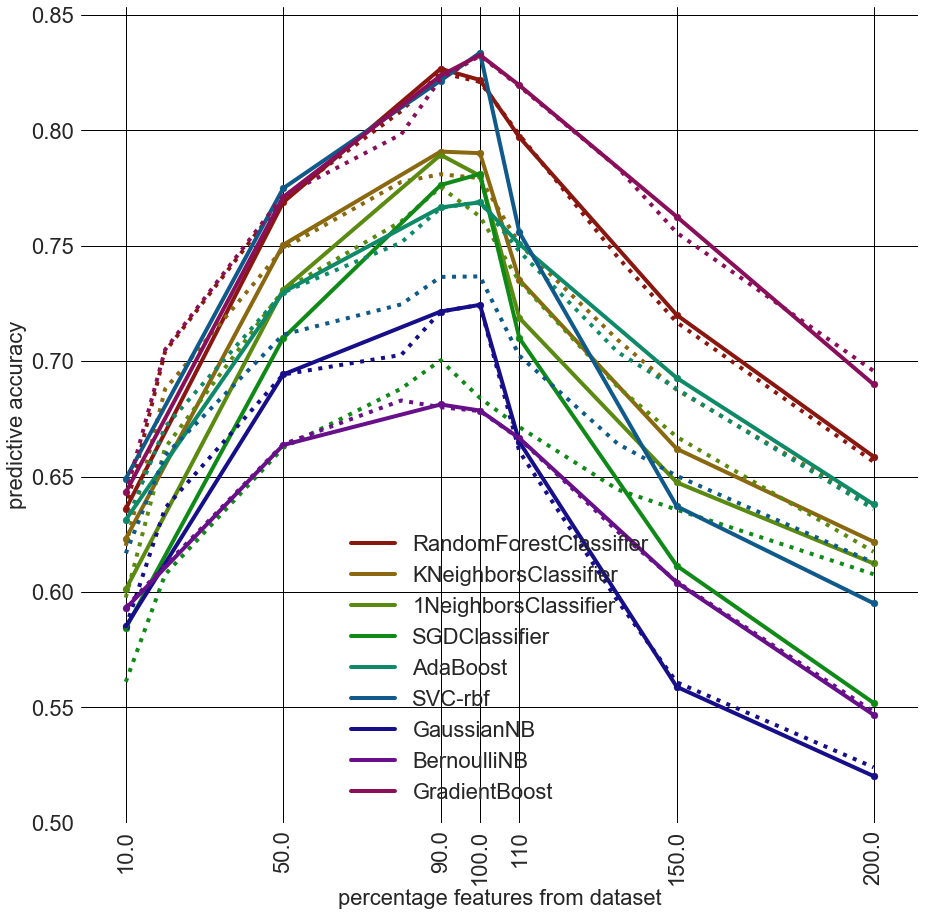

In [43]:
# # Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
# from LocalDatasets import DoneFeatureMan
# func = 'featureManipulationPre'

# amountList = [0.1,0.5,0.9,1.1,1.5,2.0]
# didList = DoneFeatureMan(func,'1NeighborsClassifier',amountList)
# func = 'featureManipulation'

# amountList3 = [0.1,0.2,0.5,0.8,0.9,1.1,1.35,1.5,2.0]
# # didList = DoneFeatureMan(func,'1NeighborsClassifier',amountList3)
# amountList3.append(1.0)
# amountList3.sort()
# scores = []
# scores2 = []

# # amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# # func2 = 'cvScoreFeatures4Fixed'
# for i,did in enumerate(didList):
#     scores.append([])
#     scores2.append([])
#     for clfName in clfNames:
#         score1 = []
#         score2 = []
#         for amount in amountList3:
#             if not amount == 1.0:
#                 if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
#                     print(func,clfName,amount,did)
#                 score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
#         scores[i].append(score1)
# score3 = []
# ratio = []
# for i in clfNames:
#     score3.append([0 for i in range(len(amountList3))])
# MaxClass = []
# for i,amount in enumerate(amountList3):
#     if amount == 1.0:
#         middle = i
# for k,x in enumerate(scores):
#     for j in range(0,len(x)):    
#         for i in range(0,len(x[j])):
#             if not middle > i:
#                 score3[j][middle] = score3[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList3)-1))
#                 score3[j][i+1] = score3[j][i+1] + (scores[k][j][i][1])/len(didList)
#             else:
#                 score3[j][middle] = score3[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList3)-1))
#                 score3[j][i] = score3[j][i] + (scores[k][j][i][1])/len(didList)



# func = 'featureManipulationPre'

# amountList = [0.1,0.5,0.9,1.1,1.5,2.0]
# didList = DoneFeatureMan(func,'1NeighborsClassifier',amountList)
# amountList.append(1.0)
# amountList.sort()
# scores = []
# for i,did in enumerate(didList):
#     scores.append([])
#     for clfName in clfNames:
#         score1 = []
#         score2 = []
#         for amount in amountList:
#             if not amount == 1.0:
#                 if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
#                     print(func,clfName,amount,did)
#                 score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
#         scores[i].append(score1)
# score2 = []
# ratio = []
# for i in clfNames:
#     score2.append([0 for i in range(len(amountList))])
# MaxClass = []
# for i,amount in enumerate(amountList):
#     if amount == 1.0:
#         middle = i
# for k,x in enumerate(scores):
#     for j in range(0,len(x)):    
#         for i in range(0,len(x[j])):
#             if not middle > i:
#                 score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
#                 score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
#             else:
#                 score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
#                 score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)

# for i,x in enumerate(amountList):
#     amountList[i] = x*100
# for i,x in enumerate(amountList3):
#     amountList3[i] = x*100
# for i,amount in enumerate(amountList):
#     if not amount == round(amount):
#         amountList[i] = round(amount)
# for i,amount in enumerate(amountList3):
#     if not amount == round(amount):
#         amountList3[i] = round(amount)
# amountList2 = copy(amountList)
# x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' accuracy against feature percentage of dataset' )
cl = sns.hls_palette(len(score2), l=.3, s=.8)
# cl = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",'#ceb301','#ff9408','#8cffdb'])
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i],linewidth=4.0)
    _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(amountList3, score3[i], color = cl[i],ls = ':',linewidth=4.0)
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage features from dataset')
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_facecolor('xkcd:white')
plt.grid(True,color='black')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
ax.legend( prop={'size': 22})
plt.show()

cvScoreFeatures4Duration RandomForestClassifier 0.25 1120
cvScoreFeatures4Duration RandomForestClassifier 0.5 1120
cvScoreFeatures4Duration RandomForestClassifier 0.75 1120
cvScoreFeatures4Duration KNeighborsClassifier 0.25 1120
cvScoreFeatures4Duration KNeighborsClassifier 0.5 1120
cvScoreFeatures4Duration KNeighborsClassifier 0.75 1120
cvScoreFeatures4Duration 1NeighborsClassifier 0.25 1120
cvScoreFeatures4Duration 1NeighborsClassifier 0.5 1120
cvScoreFeatures4Duration 1NeighborsClassifier 0.75 1120
cvScoreFeatures4Duration SGDClassifier 0.25 1120
cvScoreFeatures4Duration SGDClassifier 0.5 1120
cvScoreFeatures4Duration SGDClassifier 0.75 1120
cvScoreFeatures4Duration AdaBoost 0.25 1120
cvScoreFeatures4Duration AdaBoost 0.5 1120
cvScoreFeatures4Duration AdaBoost 0.75 1120
cvScoreFeatures4Duration SVC-rbf 0.25 1120
cvScoreFeatures4Duration SVC-rbf 0.5 1120
cvScoreFeatures4Duration SVC-rbf 0.75 1120
cvScoreFeatures4Duration GaussianNB 0.25 1120
cvScoreFeatures4Duration GaussianNB 0.5 11

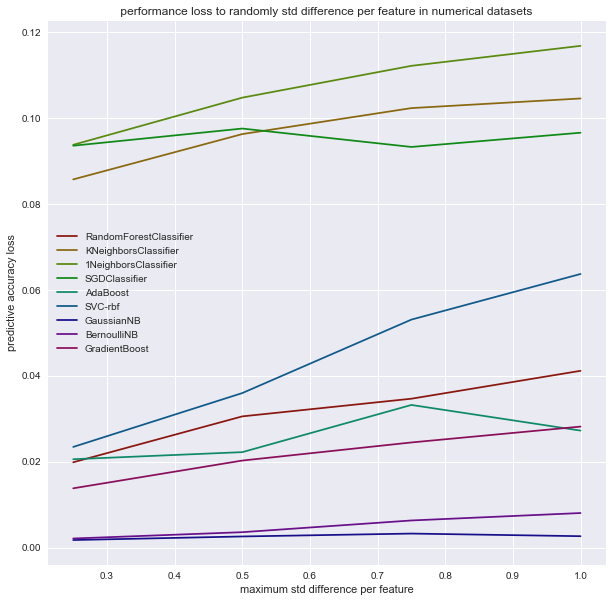

In [45]:
func = 'cvScoreFeatures4Duration'
scores = []
amountList = [0.25,0.5,0.75,1.0]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

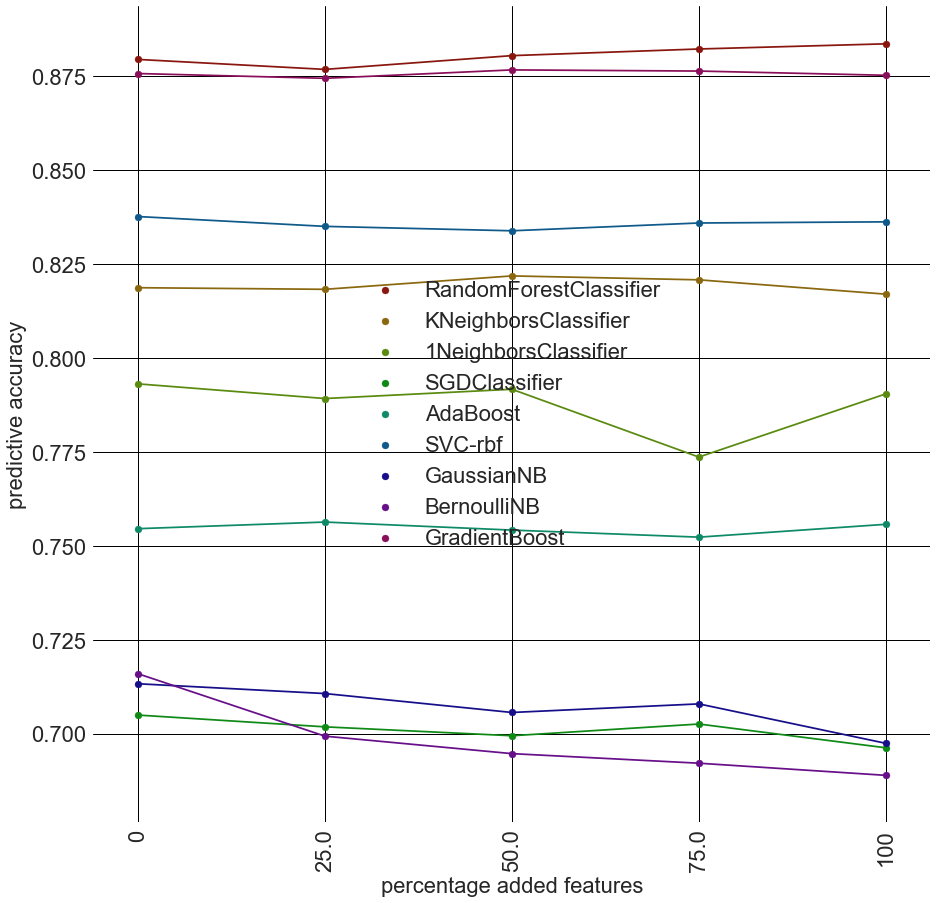

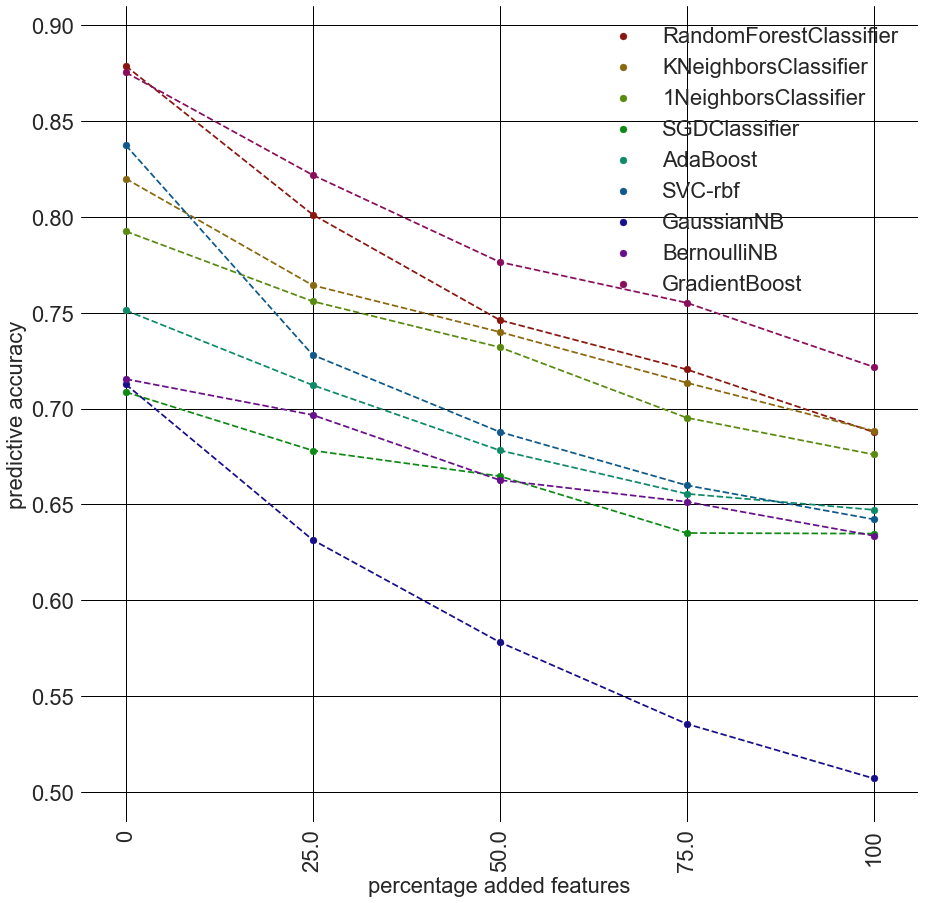

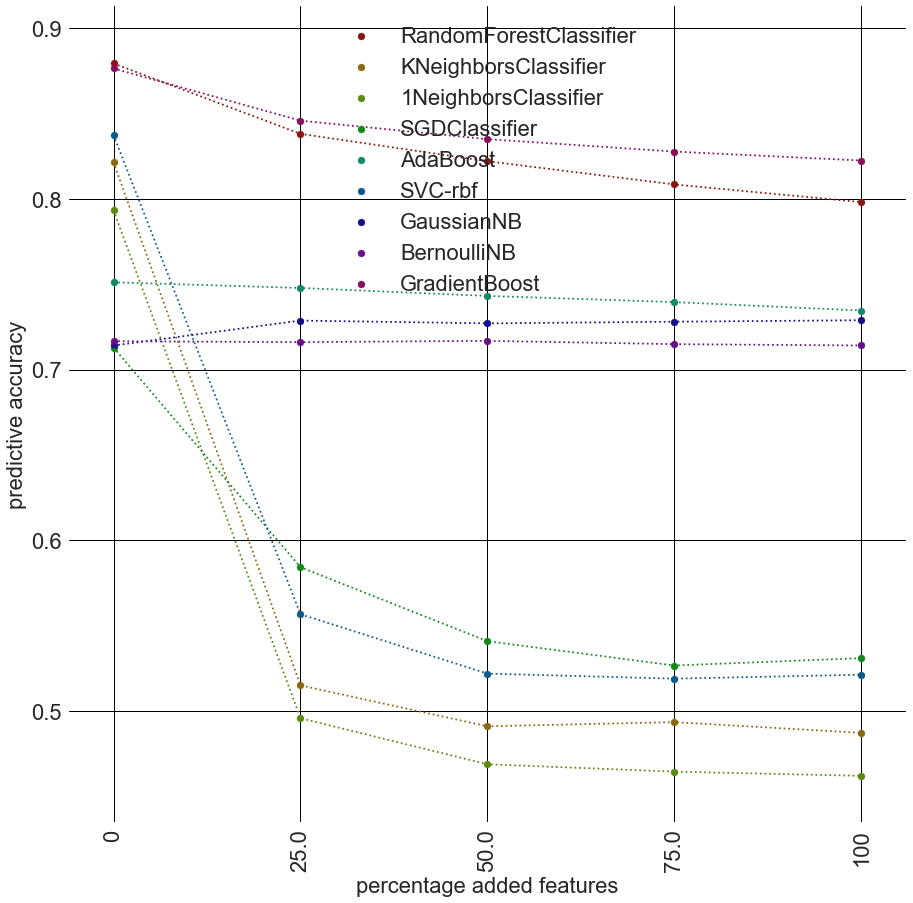

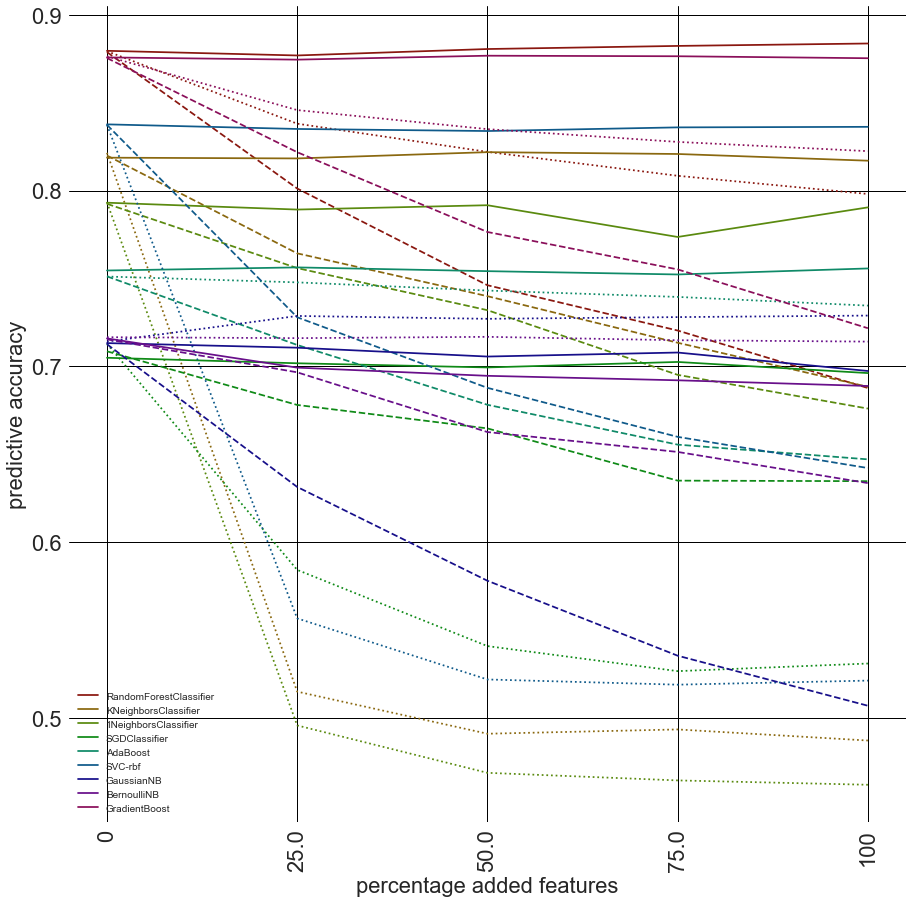

numberical datasets


In [49]:
#Three types of feature addition
func = 'cvScoreFeatures6Laptop'
func2 = 'cvScoreFeatures5Duration'
func3 = 'cvScoreFeatures4'
clfName = clfNames[0]
amountList = [0.25,0.5,0.75,1.0]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
func3Man = DoneFeatureMan(func3,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        if did in func3Man:
            intersect.append(did)
didList = []
for did in intersect:
    if did in Cat:
        didList.append(did)
# didList = intersect

# didList = Cat
scores = []
scores2 = []
scores3 = []
amountList = [0.25,0.5,0.75,1]
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    scores3.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        score3 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) or not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if did in Cat:
                score3.append(read_features('cvScoreFeatures4Fixed',clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            else:
                score3.append(read_features(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
        scores[i].append(score1)
        scores2[i].append(score2)
        scores3[i].append(score3)
score1 = []
score2 = []
score3 = []
score4 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    score4.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
            score4[j][0] = score4[j][0] + (scores3[k][j][i][0])/(len(didList)*len(amountList))
            score4[j][i+1] = score4[j][i+1] + (scores3[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList


fig, ax = plt.subplots()
# _=plt.title(' accuracy against added duplicate features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
    _=ax.plot(x_axis, score2[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i],label=clfNames[i])
#     _=ax.plot(amountList, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
# _=ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added redundant duplicate numerical features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score3[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score3[i], color = cl[i],ls = '--')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added random features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score4[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score4[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()

fig, ax = plt.subplots()
# _=plt.title('accuracy against added random features in numerical datasets' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
#     _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
#     _=ax.scatter(x_axis, score4[i], color = cl[i],label=clfNames[i])
    _=ax.plot(amountList, score4[i], color = cl[i],ls = ':')
    _=ax.plot(amountList, score3[i], color = cl[i],ls = '--')
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.show()
print('numberical datasets')